In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

# 設定 data_path
dir_data = '../dataset/'

In [2]:
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

## 練習時間

觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息
#### Eg
- 計算任意欄位的平均數及標準差
- 畫出任意欄位的[直方圖](https://zh.wikipedia.org/zh-tw/%E7%9B%B4%E6%96%B9%E5%9B%BE)

### Hints:
- [Descriptive Statistics For pandas Dataframe](https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/)
- [pandas 中的繪圖函數](https://amaozhao.gitbooks.io/pandas-notebook/content/pandas%E4%B8%AD%E7%9A%84%E7%BB%98%E5%9B%BE%E5%87%BD%E6%95%B0.html)


In [4]:
app_train.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL              float64
AMT_CREDIT                    float64
AMT_ANNUITY                   float64
AMT_GOODS_PRICE               float64
NAME_TYPE_SUITE                object
NAME_INCOME_TYPE               object
NAME_EDUCATION_TYPE            object
NAME_FAMILY_STATUS             object
NAME_HOUSING_TYPE              object
REGION_POPULATION_RELATIVE    float64
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_REGISTRATION             float64
DAYS_ID_PUBLISH                 int64
OWN_CAR_AGE                   float64
FLAG_MOBIL                      int64
FLAG_EMP_PHONE                  int64
FLAG_WORK_PHONE                 int64
FLAG_CONT_MOBILE                int64
FLAG_PHONE  

### 觀察一

AMT_CREDIT 的分布狀態為正偏態(沒記錯的話應該趨近於指數分布，若有記錯請指正)，資料中其他與金額有關的分配形狀通常也都類似。在做資料轉換的時候通常會取LOG使其分配形狀趨向常態分佈(見第二張圖)

AMT_CREDIT
mean : 599026.00, std : 402490.78


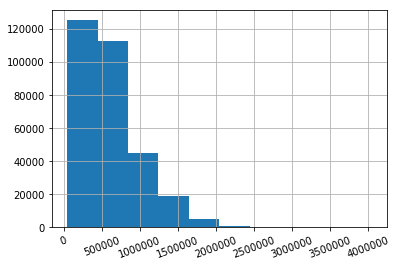

In [5]:
i = 8
print(app_train.columns[i])
print('mean : %.2f, std : %.2f'%(app_train.iloc[:,i].mean(),app_train.iloc[:,i].std()))
app_train.iloc[:,i].hist(xrot = 20)

(array([ 2187.,  5786., 16840., 53983., 43460., 72309., 69973., 36677.,
         6166.,   130.]),
 array([10.71443999, 11.16441876, 11.61439753, 12.0643763 , 12.51435507,
        12.96433384, 13.41431261, 13.86429138, 14.31427015, 14.76424892,
        15.21422769]),
 <a list of 10 Patch objects>)

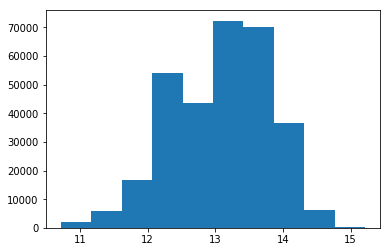

In [6]:
i = 8
plt.hist(np.log1p(app_train.iloc[:,i]))

### 觀察二

NAME_TYPE_SUITE (此欄位為類別變項，無法計算mean & stdev) 欄位中，獨自一人來借貸(Unaccompanied)的人數最多(目測比例在70%以上)、第二名則為家人陪伴而來(Family)的資料。

NAME_TYPE_SUITE


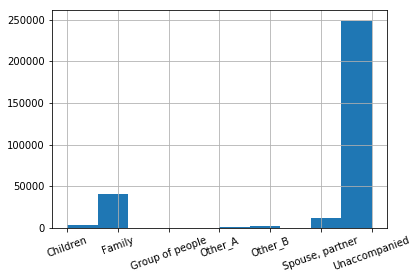

In [7]:
i=11
print(app_train.columns[i])
app_train.iloc[:,i].hist(xrot = 20)

### 觀察三

REGION_POPULATION_RELATIVE 變項據說有做normalization，不過看平均數和標準差不大確定他做標準化的range是甚麼。比較特別的是此份資料有少數用戶住的地方為人口數較多的地方(集中在兩處)，後續需要確認這部分是否會造成非線性的效果。

REGION_POPULATION_RELATIVE
mean : 0.02, std : 0.01


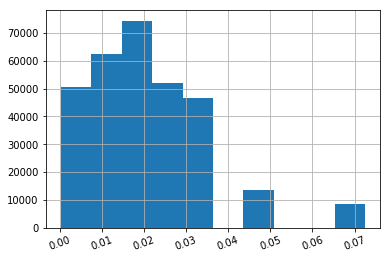

In [8]:
i = 16
print(app_train.columns[i])
print('mean : %.2f, std : %.2f'%(app_train.iloc[:,i].mean(),app_train.iloc[:,i].std()))
app_train.iloc[:,i].hist(xrot = 20)

In [9]:
i = 16
app_train.groupby('REGION_POPULATION_RELATIVE')['AMT_CREDIT'].count().tail()

REGION_POPULATION_RELATIVE
0.031329    11321
0.032561     6636
0.035792    16408
0.046220    13442
0.072508     8412
Name: AMT_CREDIT, dtype: int64